In [1]:
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
print("import done")

import done


In [2]:
cols=['UserID','MovieID','Rating','Timestamp']
ratings=pd.read_csv('data/ml-1m/ratings.dat',sep='::',engine='python',names=cols)

mov=['MovieID','Title','Genres']
movies=pd.read_csv('data/ml-1m/movies.dat',sep='::',engine='python',names=mov)

In [4]:
val=ratings['MovieID'].value_counts()
print(val)

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3323       1
624        1
763        1
2484       1
133        1
Name: MovieID, Length: 3706, dtype: int64


In [5]:
x=val[val<1000].index
x

Int64Index([1266,  551, 1909, 3897, 3363,  329, 3052, 1183, 2353,  539,
            ...
            3321, 2226, 3607, 1714, 1709, 3323,  624,  763, 2484,  133],
           dtype='int64', length=3499)

In [6]:
new_rat=ratings[~ratings['MovieID'].isin(x)].index
ratings.drop(index=new_rat,inplace=True)

In [7]:
x.nunique()

3499

In [8]:
df = pd.merge(ratings, movies, on='MovieID')
print(df.shape)

(694836, 6)


In [9]:
df.drop(['Timestamp','Genres','Title'],axis=1,inplace=True)
df['Rating'].replace(np.nan,0,inplace=True)
df['Rating'].replace([1,2,3,4,5],1,inplace=True)

df.head()

,UserID,MovieID,Rating
0,1,661,1
1,23,661,1
2,49,661,1
3,53,661,1
4,57,661,1


In [10]:
df.groupby('MovieID').size().sort_values(ascending=False)[:10]

MovieID
1266    997
1909    996
551     996
3897    994
329     990
3363    990
3052    989
1183    989
2353    988
539     986
dtype: int64

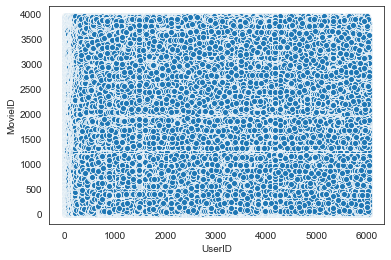

In [24]:
sns.scatterplot(x=df['UserID'],y=df['MovieID'])

In [25]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal